# Financial Crisis Prediction Project

This notebook demonstrates how to predict banking crises using various machine learning models and visualizations.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
file_path = 'african_crises.csv'
df = pd.read_csv(file_path)
df_bk = df.copy()

In [ ]:
# Quick data overview
print('Data shape:', df.shape)
df.info()
df.head()

Data shape: (1059, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 1

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# Check for missing values
missing = df.isnull().sum()
print('Missing values per column:')
print(missing)

Missing values per column:
case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64


In [ ]:
# Descriptive statistics
print(df.describe())

              case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%   

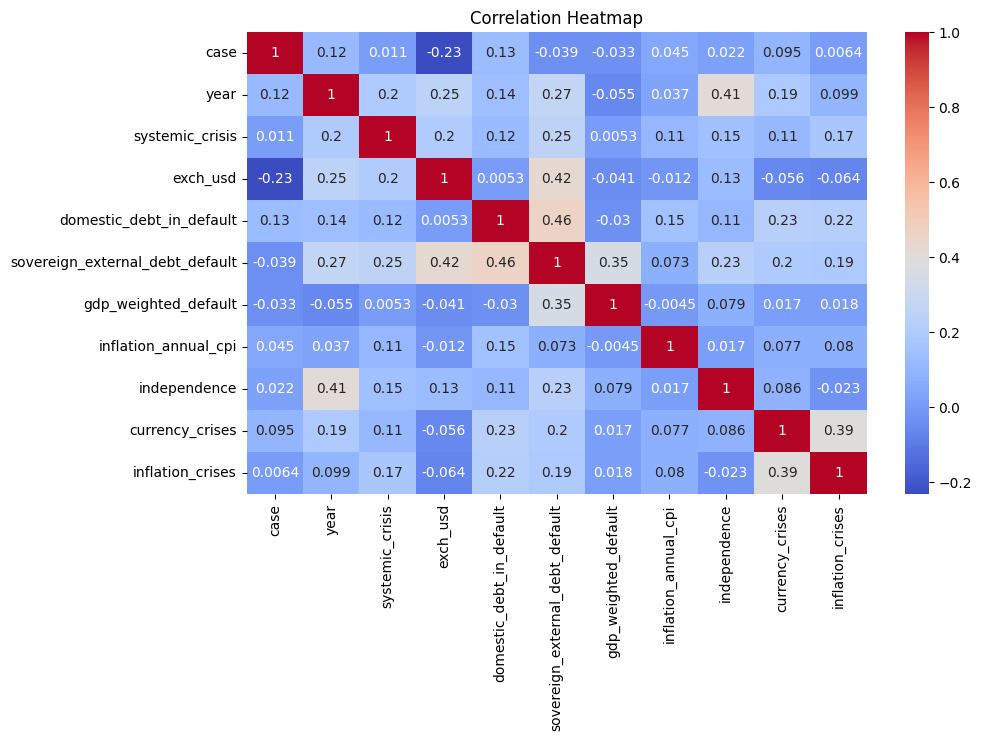

In [ ]:
# Correlation heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution of banking crisis
fig = px.histogram(df, x='banking_crisis', color='banking_crisis', color_discrete_map={'crisis': 'red', 'no_crisis': 'blue'}, template='plotly_white')
fig.update_layout(title='Banking Crisis Distribution')
fig.show()

In [ ]:
# Country-wise inflation rate over years
fig = px.line(df.sort_values(by='year'), x='year', y='inflation_annual_cpi', animation_frame='country', labels={'inflation_annual_cpi': 'CPI Inflation Rate'}, color='country', markers=True, template='plotly_white', title='Country-wise Annual Inflation Rate Over Years')
fig.update_traces(showlegend=False)
fig.show()

In [ ]:
# Country-wise exchange rate over years
fig = px.line(df.sort_values(by='year'), x='year', y='exch_usd', animation_frame='country', labels={'exch_usd': 'Exchange Rate USD'}, color='country', markers=True, template='plotly_white', title='Country-wise Exchange Rate Over Years')
fig.update_traces(showlegend=False)
fig.show()

In [ ]:
# Inflation rate bar chart by country and year
fig = px.bar(df, x='country', y='inflation_annual_cpi', color='inflation_annual_cpi', animation_frame='year', text='inflation_annual_cpi', labels={'inflation_annual_cpi': 'CPI Inflation Rate'}, template='plotly_white', title='Inflation Rate in Every Country')
fig.show()

In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        df[col] = le.fit_transform(df[col])


cc3
country
banking_crisis


In [ ]:
# Split features and target
X = df.drop('banking_crisis', axis=1)
y = df['banking_crisis']

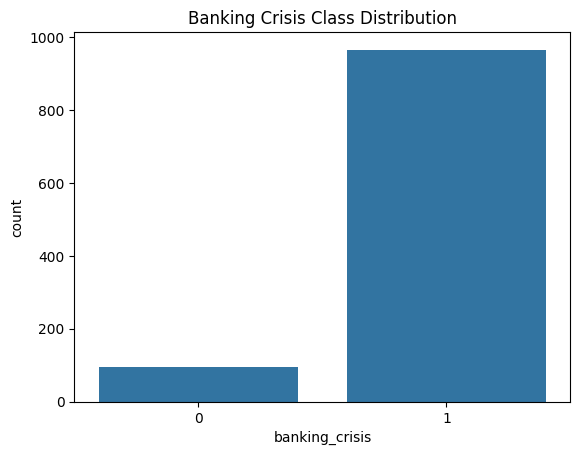

In [ ]:
# Visualize class imbalance
sns.countplot(x=y)
plt.title('Banking Crisis Class Distribution')
plt.show()

In [ ]:
# Handle class imbalance with oversampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.15)
X_over, y_over = oversample.fit_resample(X, y)
print('Oversampled class distribution:')
print(pd.Series(y_over).value_counts())

Oversampled class distribution:
banking_crisis
1    965
0    144
Name: count, dtype: int64


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print()

Train shape: (776, 13)
Test shape: (333, 13)


In [ ]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
# Prepare results DataFrame
results = pd.DataFrame(columns=['Model Name', 'True Positive', 'False Negative', 'False Positive', 'True Negative', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'])

In [ ]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(probability=True),
    BaggingClassifier(estimator=None, n_estimators=100),
    GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100),
    lgb.LGBMClassifier(),
    GaussianNB()
]
model = LogisticRegression()
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'KNeighborsClassifier', 'SVC', 'BaggingClassifier', 'GradientBoostingClassifier', 'LGBMClassifier', 'GaussianNB']

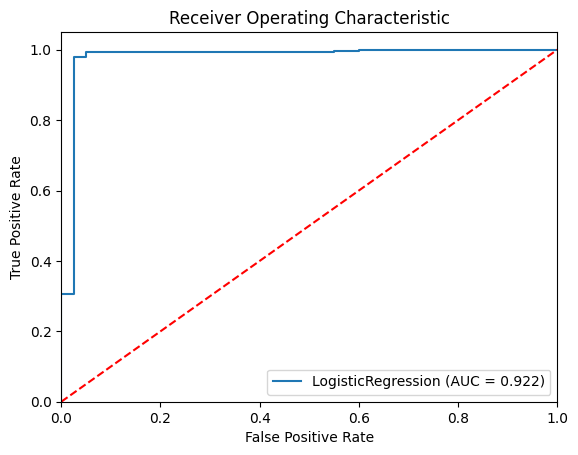

Completed: LogisticRegression
----------------------------------------------------------------------------------------------------


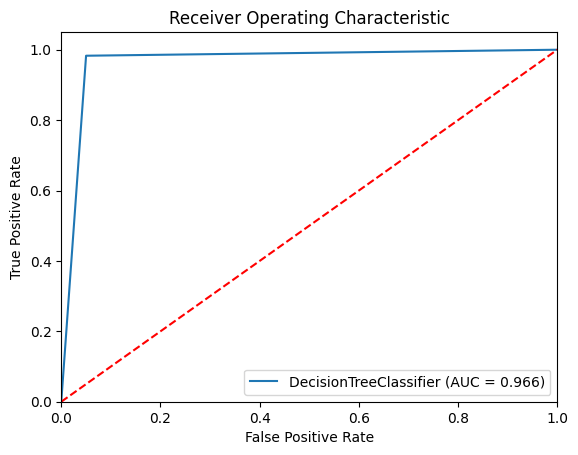

Completed: DecisionTreeClassifier
----------------------------------------------------------------------------------------------------


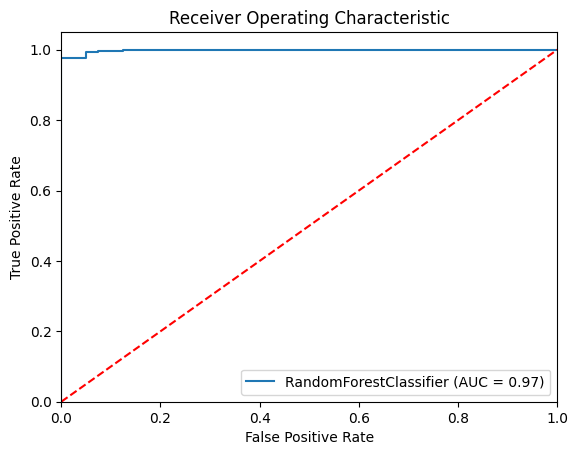

Completed: RandomForestClassifier
----------------------------------------------------------------------------------------------------


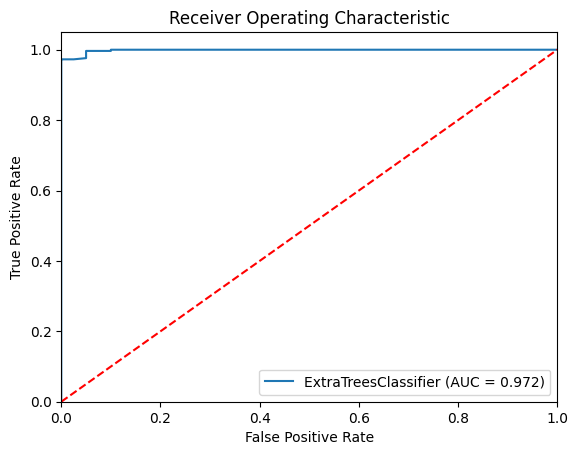

Completed: ExtraTreesClassifier
----------------------------------------------------------------------------------------------------


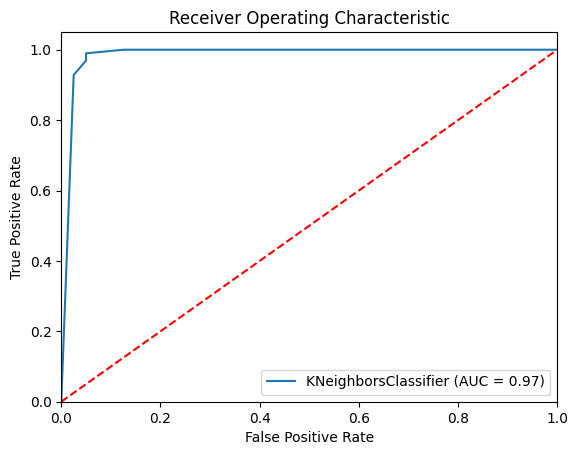

Completed: KNeighborsClassifier
----------------------------------------------------------------------------------------------------


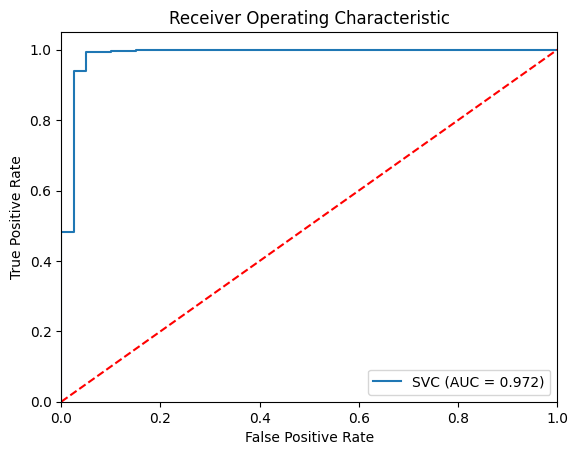

Completed: SVC
----------------------------------------------------------------------------------------------------


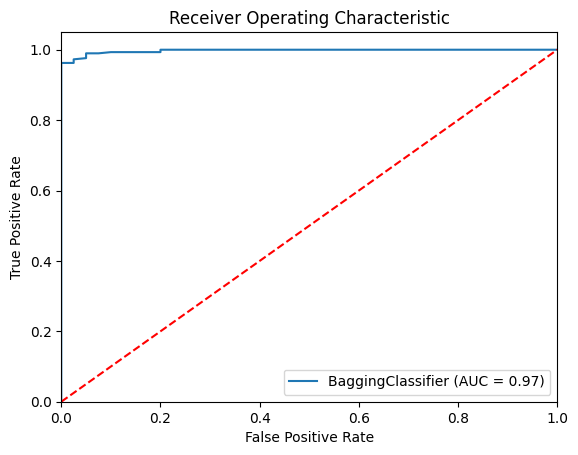

Completed: BaggingClassifier
----------------------------------------------------------------------------------------------------


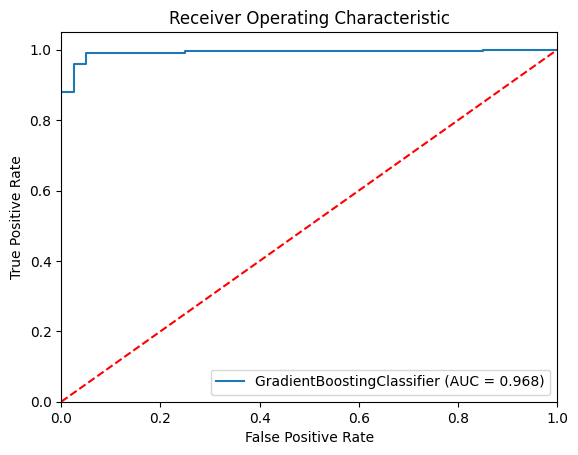

Completed: GradientBoostingClassifier
----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 672, number of negative: 104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.865979 -> initscore=1.865867
[LightGBM] [Info] Start training from score 1.865867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

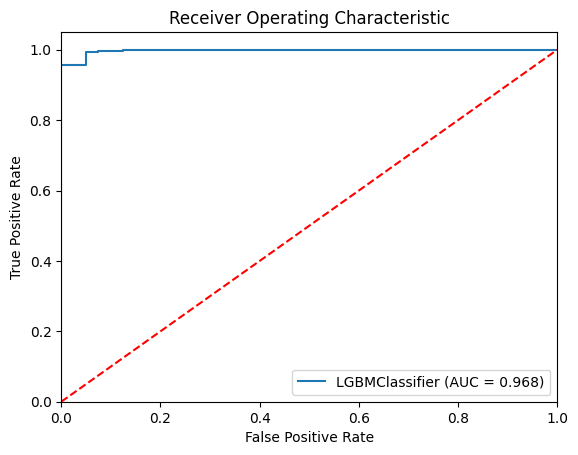

Completed: LGBMClassifier
----------------------------------------------------------------------------------------------------


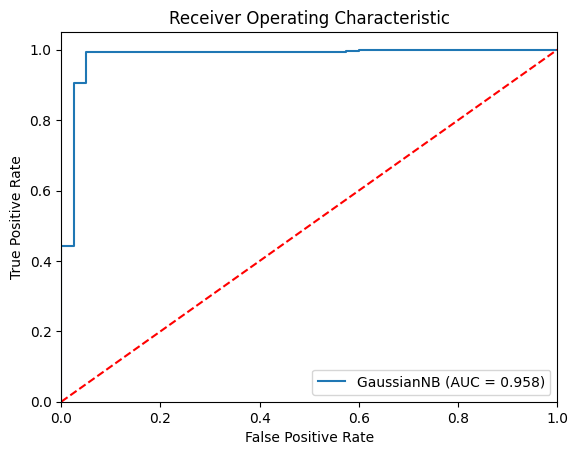

Completed: GaussianNB
----------------------------------------------------------------------------------------------------


In [ ]:
# Train and evaluate LogisticRegression model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import math

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
actual = y_test
predicted = y_pred
matrix = confusion_matrix(actual, predicted, labels=[1, 0])
tp, fn, fp, tn = matrix.reshape(-1)
sensitivity = round(tp / (tp + fn), 3)
specificity = round(tn / (tn + fp), 3)
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3)
f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)
mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / math.sqrt(mx), 3) if mx != 0 else 0
roc_auc = round(roc_auc_score(actual, predicted), 3)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall (Sensitivity):', sensitivity)
print('F1 Score:', f1Score)
print('Specificity:', specificity)
print('MCC:', MCC)
print('ROC AUC Score:', roc_auc)
print('Balanced Accuracy:', balanced_accuracy)

# ROC Curve
fpr, tpr, thresholds = roc_curve(actual, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'LogisticRegression (AUC = {roc_auc})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print('Completed: LogisticRegression')
print('-' * 100)

In [ ]:
# Show results
results.sort_values(by=['Accuracy', 'F1 Score', 'Recall', 'Precision'], ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,ExtraTreesClassifier,291,2,2,38,0.988,0.993,0.993,0.993,0.95,0.943,0.972,0.972
1,SVC,291,2,2,38,0.988,0.993,0.993,0.993,0.95,0.943,0.972,0.972
2,RandomForestClassifier,290,3,2,38,0.985,0.993,0.990,0.991,0.95,0.930,0.970,0.970
3,KNeighborsClassifier,290,3,2,38,0.985,0.993,0.990,0.991,0.95,0.930,0.970,0.970
4,BaggingClassifier,290,3,2,38,0.985,0.993,0.990,0.991,0.95,0.930,0.970,0.970
5,GradientBoostingClassifier,289,4,2,38,0.982,0.993,0.986,0.990,0.95,0.917,0.968,0.968
6,LGBMClassifier,289,4,2,38,0.982,0.993,0.986,0.990,0.95,0.917,0.968,0.968
7,DecisionTreeClassifier,288,5,2,38,0.979,0.993,0.983,0.988,0.95,0.904,0.966,0.966
8,LogisticRegression,291,2,6,34,0.976,0.980,0.993,0.986,0.85,0.883,0.922,0.922
9,GaussianNB,283,10,2,38,0.964,0.993,0.966,0.979,0.95,0.848,0.958,0.958


In [ ]:
# Show sample predictions for SVM model
svm_model = models[5]
y_pred = svm_model.predict(X_test)
out = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
out = df_bk.merge(out, left_index=True, right_index=True)
out['actual'].replace(1, 'no_crisis', inplace=True)
out['actual'].replace(0, 'crisis', inplace=True)
out['predicted'].replace(1, 'no_crisis', inplace=True)
out['predicted'].replace(0, 'crisis', inplace=True)
out[['country', 'year', 'banking_crisis', 'predicted']].sample(10)

,country,year,banking_crisis,predicted
926,Zambia,1972,no_crisis,no_crisis
306,Egypt,1883,no_crisis,no_crisis
832,Tunisia,1950,no_crisis,no_crisis
331,Egypt,1908,no_crisis,no_crisis
113,Angola,1949,no_crisis,no_crisis
959,Zambia,2005,no_crisis,no_crisis
107,Angola,1943,no_crisis,no_crisis
101,Angola,1937,no_crisis,no_crisis
321,Egypt,1898,no_crisis,no_crisis
1000,Zimbabwe,1955,no_crisis,no_crisis
